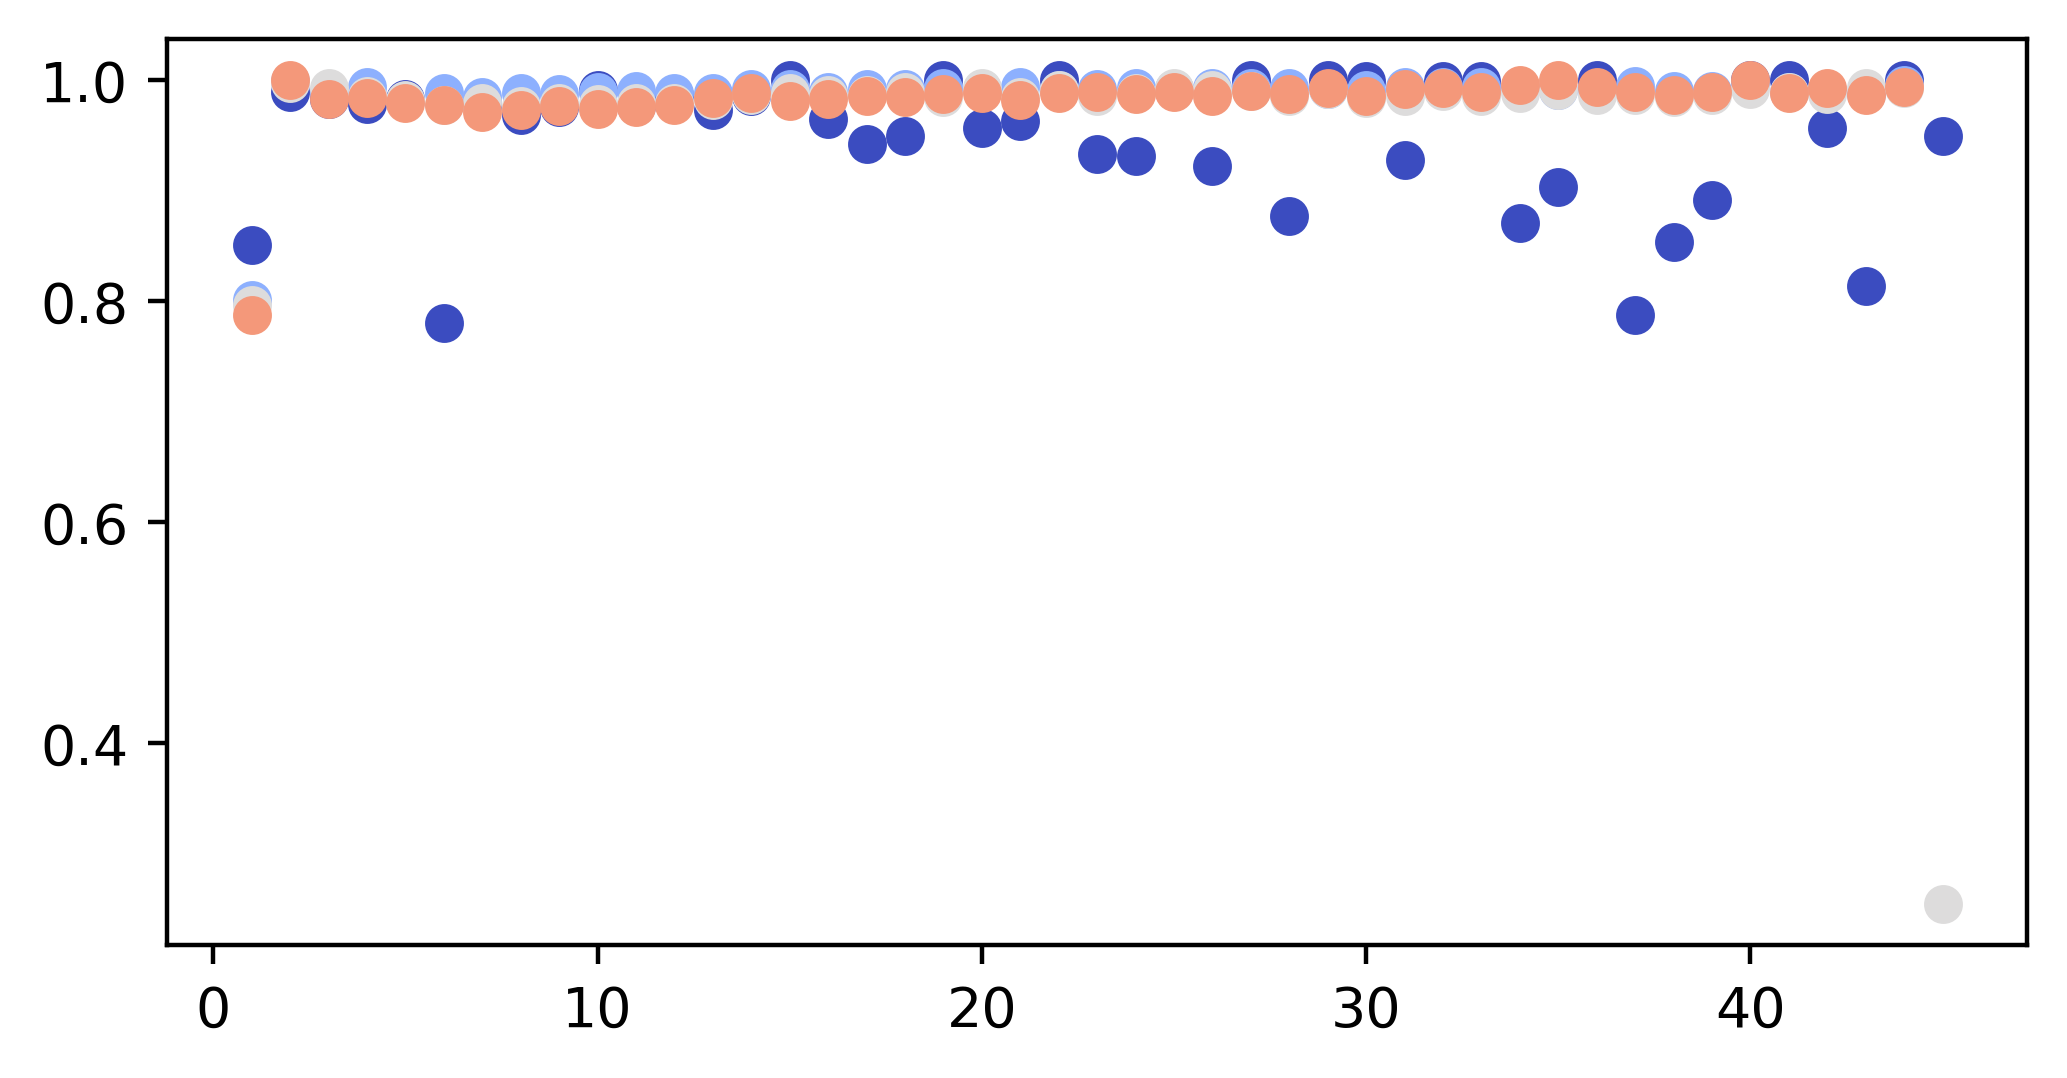

        -1.0000000E+000  -2.3254190E-001  -9.9706471E-001  \
0                  -1.0        -0.248591        -0.997599   
1                  -1.0        -0.241528        -0.997904   
2                  -1.0        -0.222502        -0.997217   
3                  -1.0        -0.210931        -0.997714   
4                  -1.0        -0.204323        -0.997027   
...                 ...              ...              ...   
289227             -1.0        -0.125320        -0.997103   
289228             -1.0        -0.125389        -0.997523   
289229             -1.0        -0.125389        -0.998286   
289230             -1.0        -0.125335        -0.997027   
289231             -1.0        -0.125412        -0.997561   

        -4.432760697546933E-003  
0                     -0.004710  
1                     -0.004987  
2                     -0.005264  
3                     -0.005541  
4                     -0.005818  
...                         ...  
289227                -0.5739

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from glob import glob
from io import StringIO
from collections import namedtuple
from datetime import datetime
import pytz

file_dir = "/Users/wesleychang/OneDrive - Drexel University/Chang Lab/General/Group/Data/Landt_cyclers/"
filenames = glob(file_dir+"04102024_AS_CC00*.csv")

file_dir2 = "/Users/wesleychang/OneDrive - Drexel University/Chang Lab/General/Group/Data/Biologic/"
biologic_file = "0416_AS_C009_MG_Run_CurrentRampTest_C01.mpt"

fig1 = plt.figure(dpi=400, figsize = (6, 10))
colors = plt.get_cmap('coolwarm')

ax1 = fig1.add_subplot(311)
# ax2 = fig1.add_subplot(312)
# ax3 = fig1.add_subplot(313)

# Separate cycles
for i,f in enumerate(filenames):
    battery_data = pd.read_csv(f)

    for c in battery_data['CycleNo'].unique():
        plate_cap = battery_data[(battery_data['CycleNo']==c) & (battery_data['Current/uA']<0)]['Capacity/uAh']
        strip_cap = battery_data[(battery_data['CycleNo']==c+1) & (battery_data['Current/uA'] > 0)]['Capacity/uAh']
        # print(np.max(strip_cap)/np.max(plate_cap))
        ax1.scatter(c, np.max(strip_cap)/np.max(plate_cap), color = colors(i/len(filenames)))
    # print(battery_data[battery_data['CycleNo']==2]['Voltage/V'])
plt.show()


biologic_data = pd.read_csv(file_dir2+biologic_file,sep='\t',skiprows=90,usecols=[7,8,9,10],encoding='latin-1')

print(biologic_data)




